In [51]:
root_path = '/home/drl/PycharmProjects/rl_baselines/pytorch-a2c-ppo-acktr'
import os 
os.chdir(root_path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from utils import IO
from utils.Logger import LoggerCsv
from eval.plot_results import *

v_e = eval_data_df.loc[:, '1':'6'].values

c_command = eval_data_df.loc[:, '7':'9'].values

xyz = eval_data_df.loc[:, '10':'12'].values

In [52]:
GA_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/GA_straight_line'
RL_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/RL_straight_line'

num_data = 5

GA_data_df = []
RL_data_df =[]
for i in range(num_data):
     
    ga_data_df = pd.read_csv(os.path.join(GA_data_path, 'log_data{}.csv'.format(i)))
    rl_data_df = pd.read_csv(os.path.join(RL_data_path, 'log_data_rl_{}.csv'.format(i)))
    
    
    GA_data_df.append(ga_data_df)
    RL_data_df.append(rl_data_df)
    
 

max_step = 2000
dt = 0.01
save_plot_path = os.path.join(data_path, 'No_{}'.format(i))
 
 

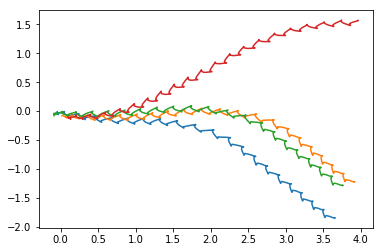

In [53]:
plt.figure()
 
t = np.arange(0, max_step * dt, dt)

for i in range(num_data):
    xyz = GA_data_df[i].loc[:, '10':'12'].values
    plt.plot(xyz[:max_step, 0], xyz[:max_step, 1]  )
 

<Figure size 432x288 with 0 Axes>

(-2, 1.5)

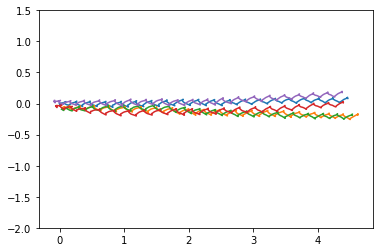

In [43]:
a = np.random.uniform(size=10, low= 0.1, high = 0.1)
T = np.ones(10)
T[2]=0
#T = np.diag(T)
T

a * T

array([0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [ ]:
if save_plot_path is not None:
    plt.savefig(save_plot_path + '-xy.jpg')
else:
    plt.show()